In [1]:
import pandas as pd

# Load a sample dataset
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Display the first 5 rows
display(df.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [2]:
display(df.describe())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_values = df.isnull().sum()

if missing_values.sum() > 0:
    print("Missing values per column:")
    display(missing_values[missing_values > 0])
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Heatmap of Missing Values')
    plt.show()
else:
    print("No missing values in the dataset.")

No missing values in the dataset.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

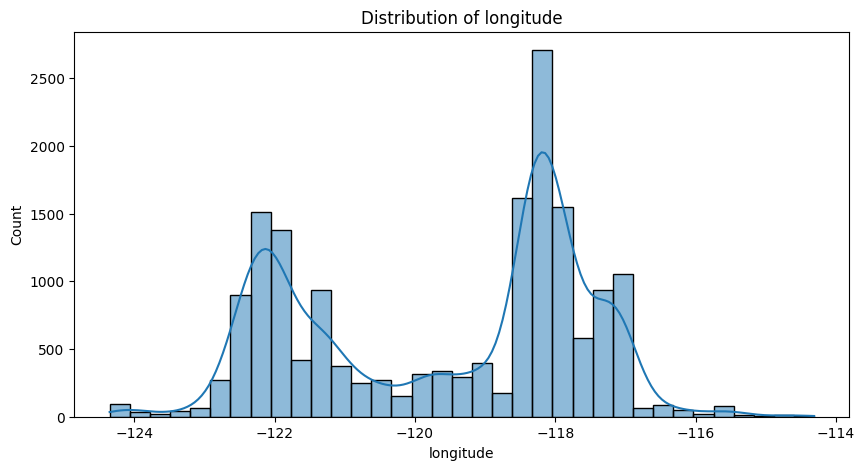

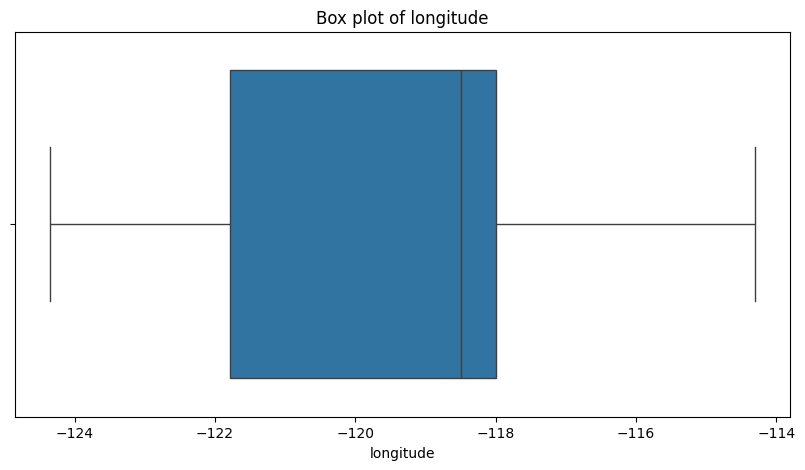

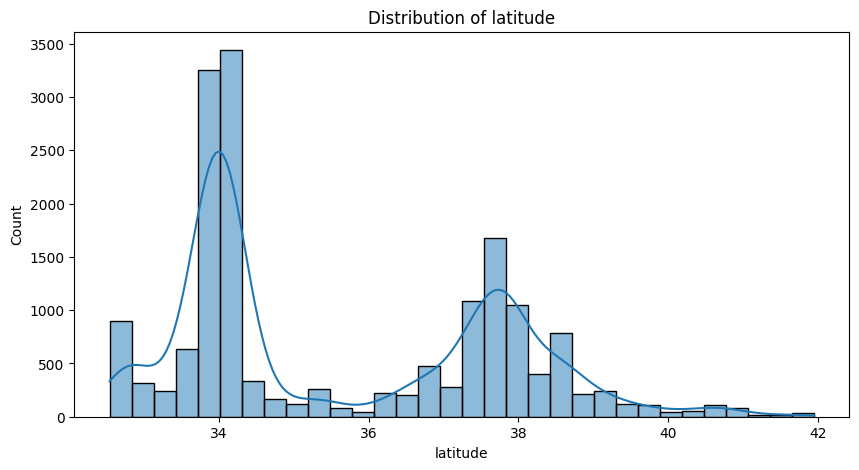

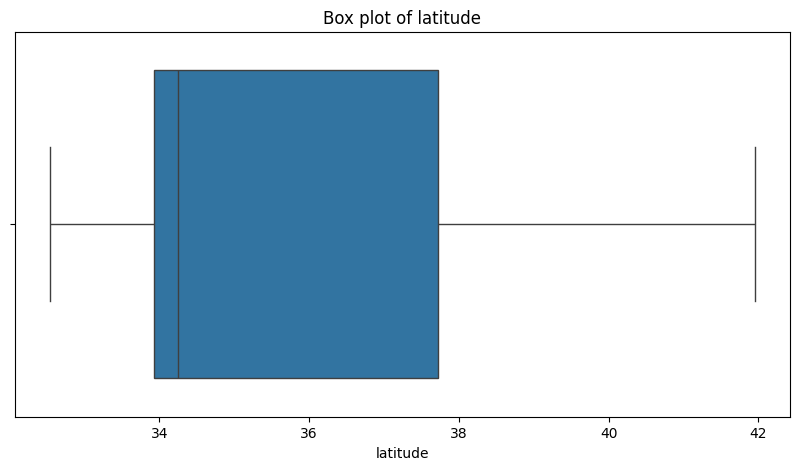

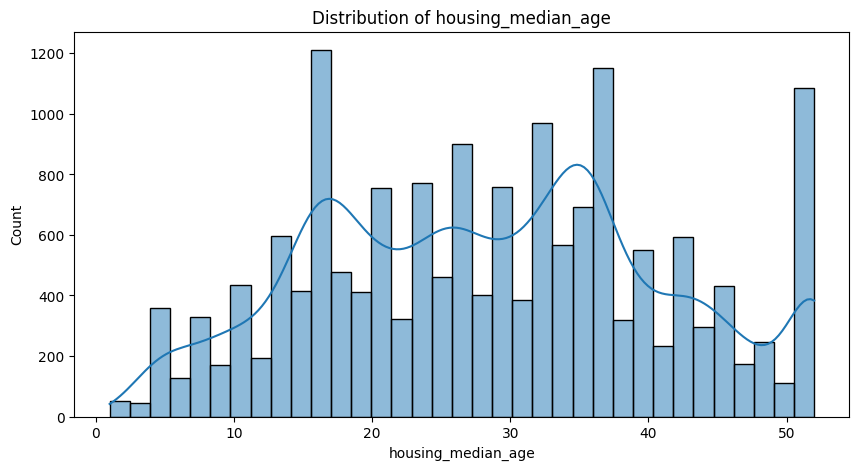

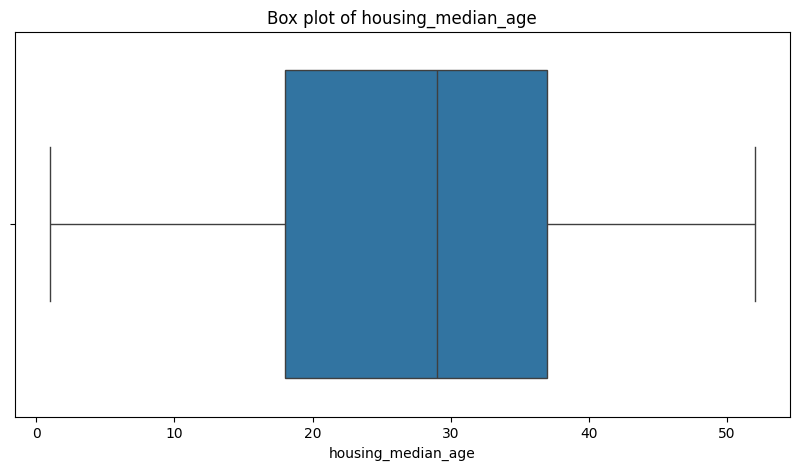

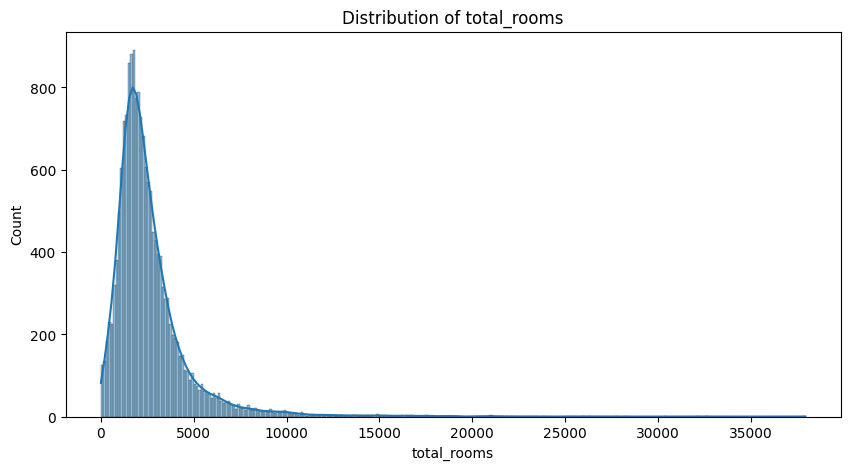

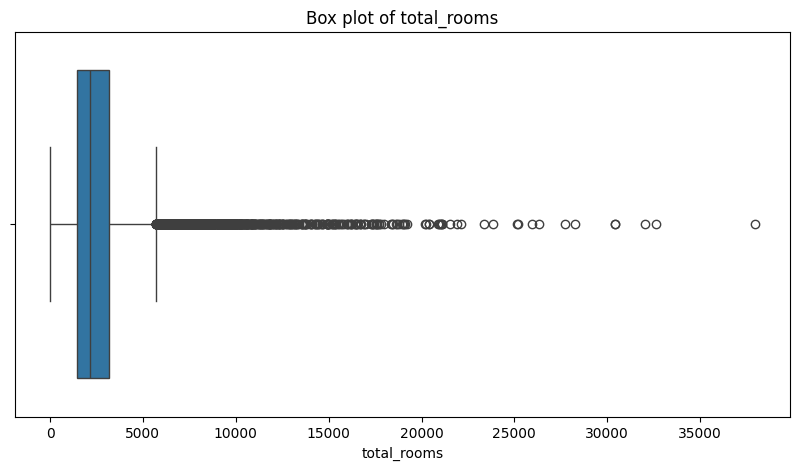

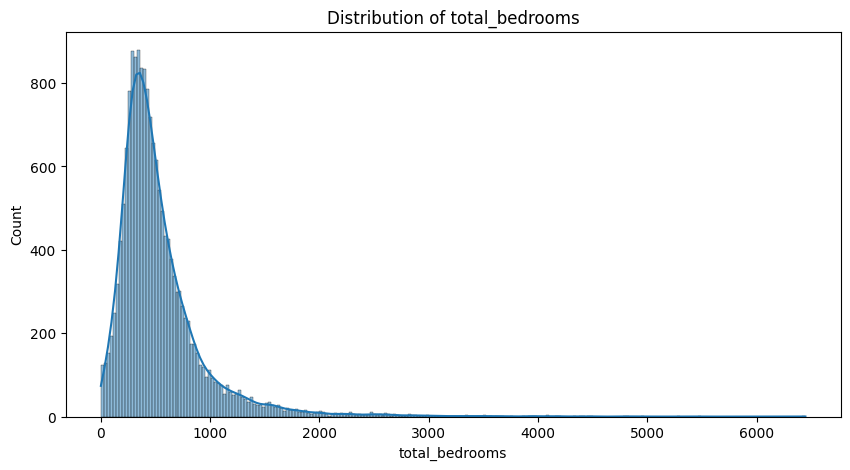

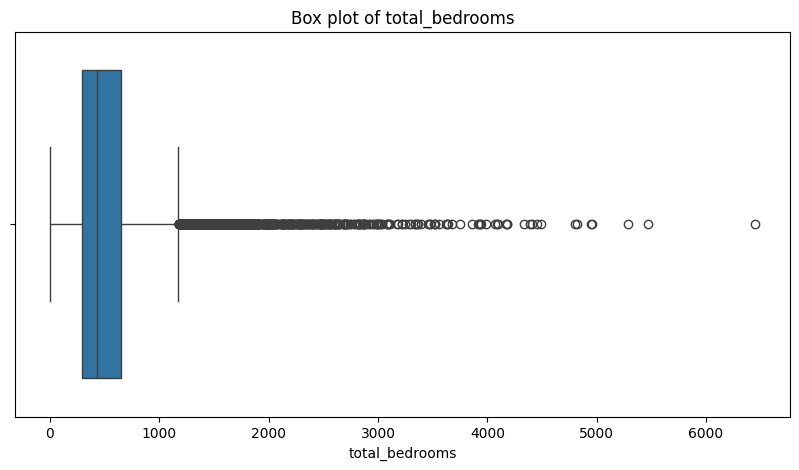

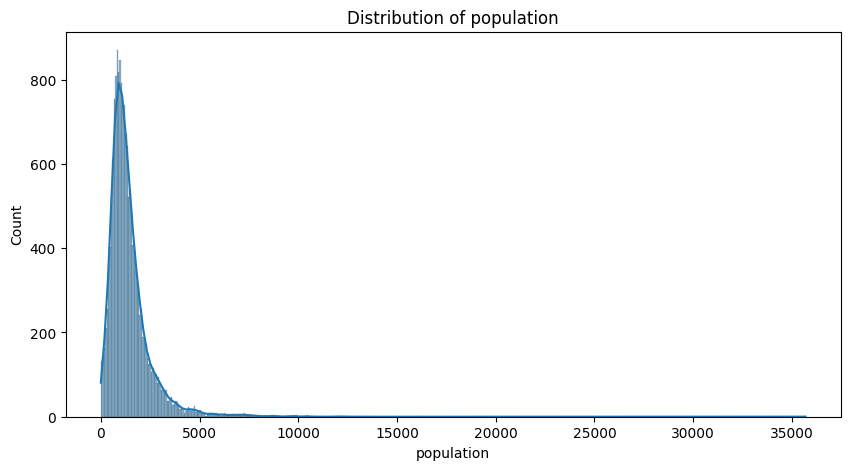

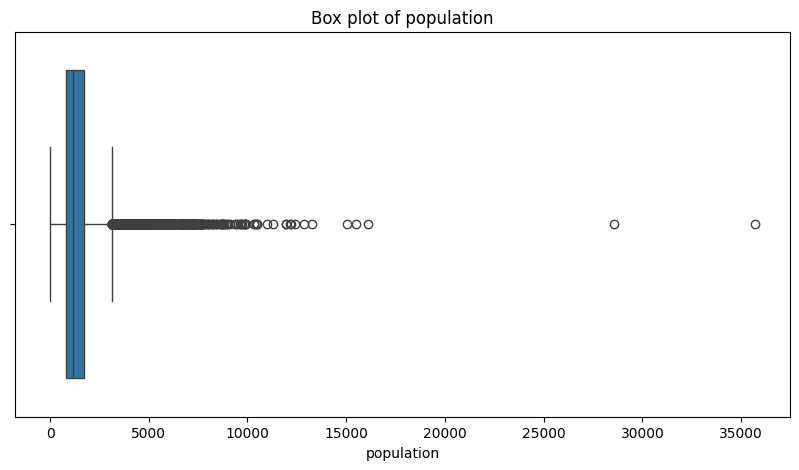

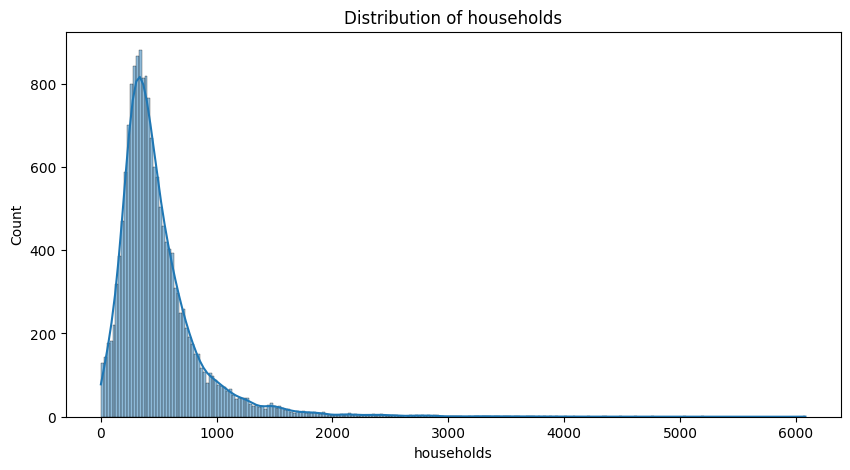

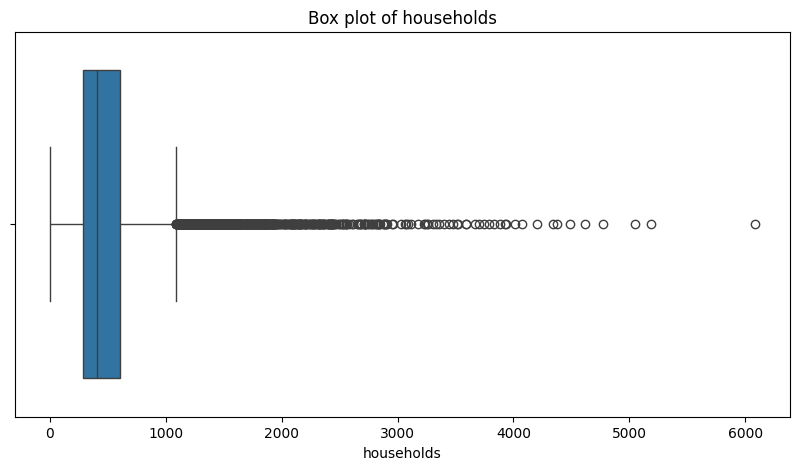

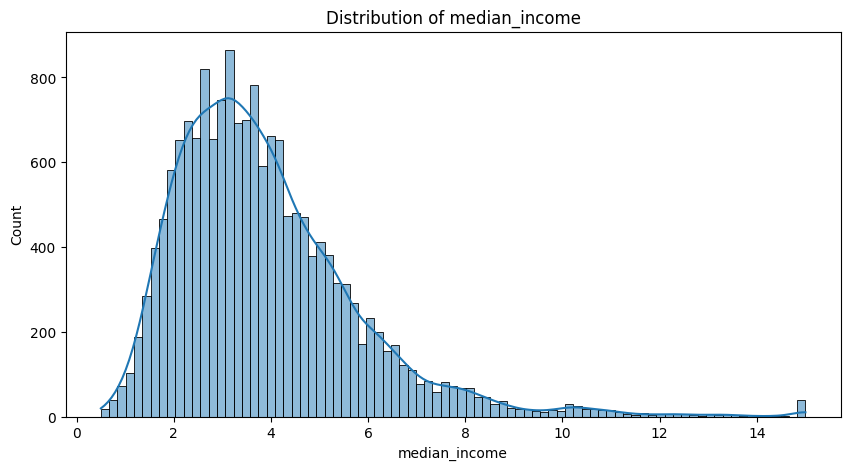

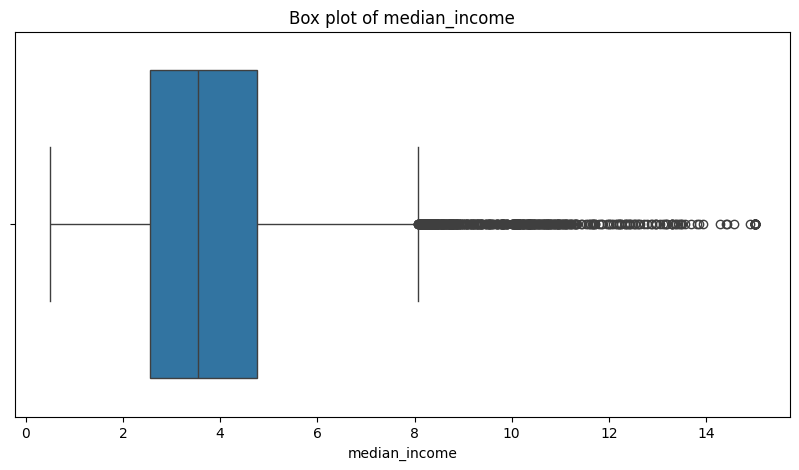

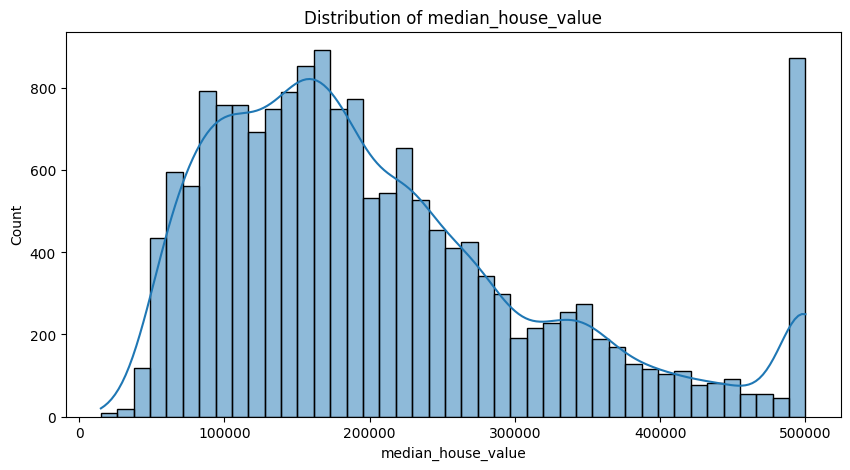

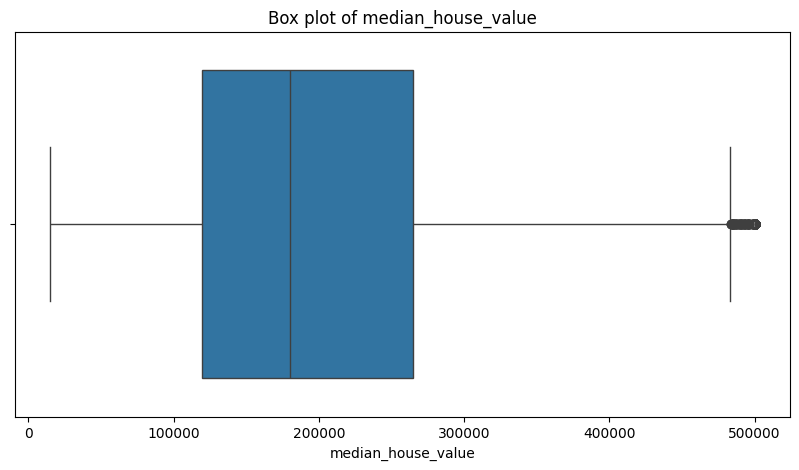

In [5]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

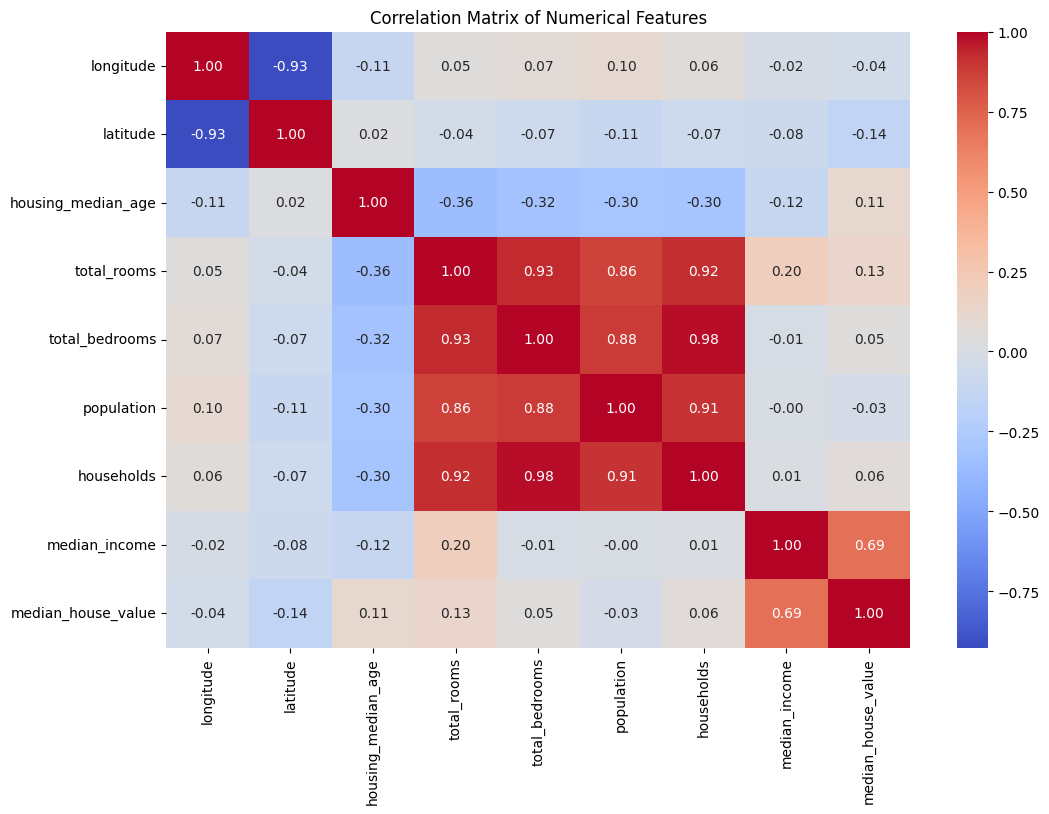

In [6]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

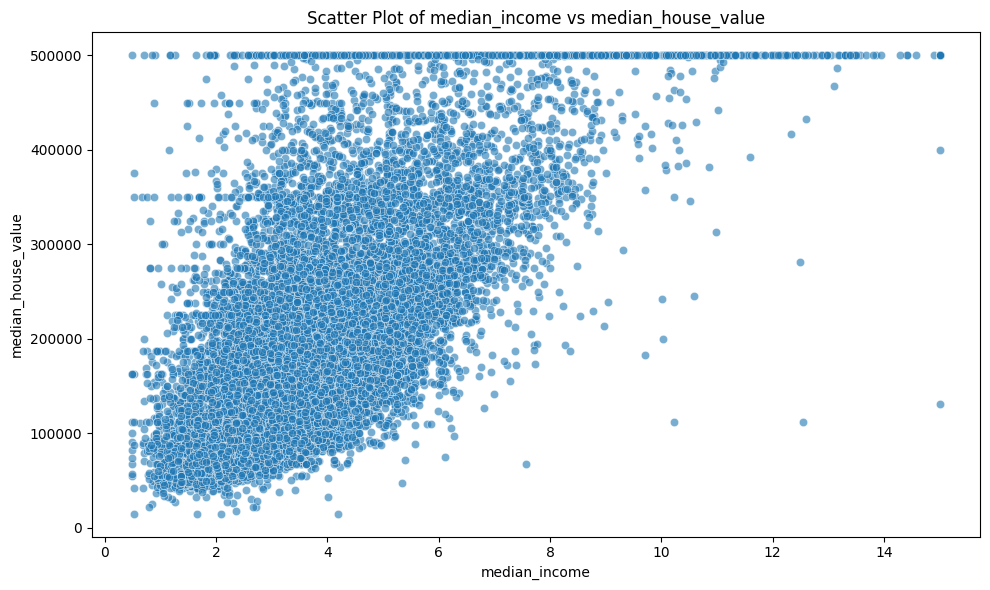

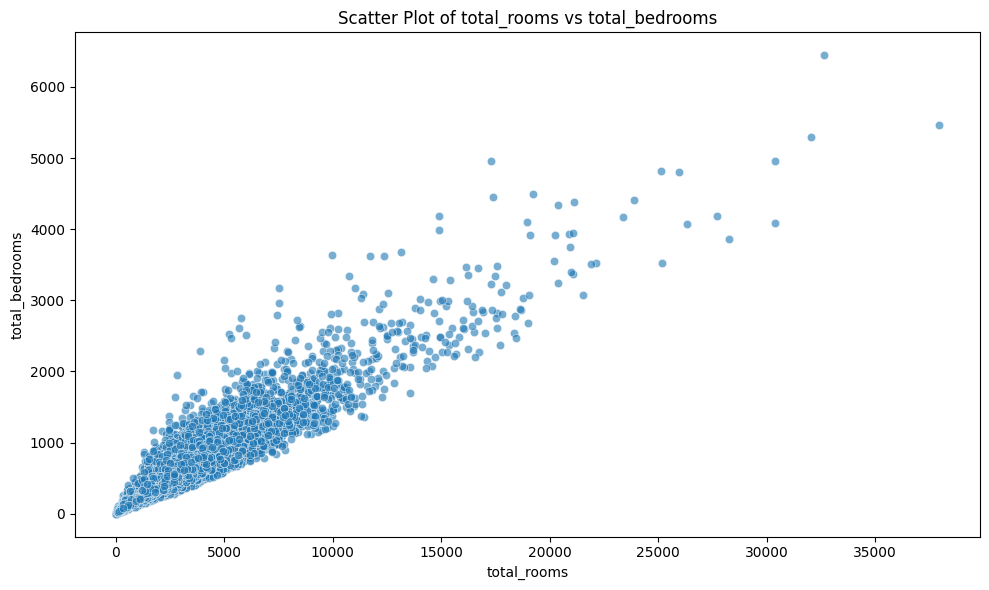

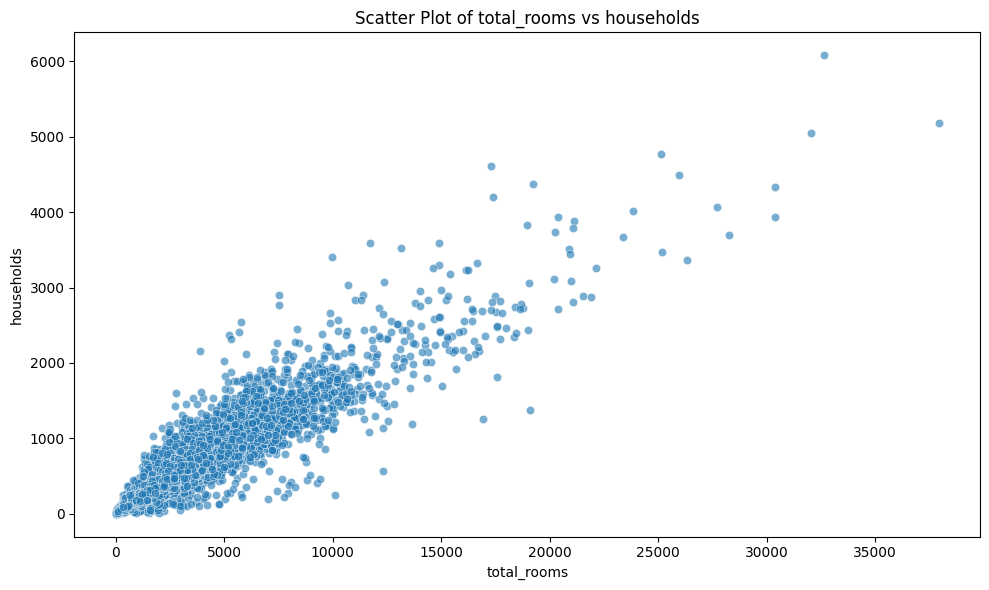

In [8]:
# Select pairs of features with interesting correlations
selected_pairs = [('median_income', 'median_house_value'), ('total_rooms', 'total_bedrooms'), ('total_rooms', 'households')]

for col1, col2 in selected_pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col1, y=col2, alpha=0.6)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.tight_layout()
    plt.show()

In [10]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

print("Outliers have been capped in numerical columns.")
display(df.describe())

Outliers have been capped in numerical columns.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2445.264088,503.553426,1337.415029,469.674353,3.814780,206458.723294
std,2.005166,2.137340,12.586937,1393.232764,287.800876,764.226718,265.566075,1.670174,113897.394195
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,5685.125000,1175.125000,3117.500000,1090.125000,8.067938,483400.000000


In [11]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

display(df.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-114.31,34.19,15.0,5612.000,1175.125,1015.0,472.0,1.4936,66900.0,11.889831,0.209395,2.150424
1,-114.47,34.40,19.0,5685.125,1175.125,1129.0,463.0,1.8200,80100.0,12.278888,0.206702,2.438445
2,-114.56,33.69,17.0,720.000,174.000,333.0,117.0,1.6509,85700.0,6.153846,0.241667,2.846154
3,-114.57,33.64,14.0,1501.000,337.000,515.0,226.0,3.1917,73400.0,6.641593,0.224517,2.278761
4,-114.57,33.57,20.0,1454.000,326.000,624.0,262.0,1.9250,65500.0,5.549618,0.224209,2.381679


In [12]:
from sklearn.preprocessing import StandardScaler

numerical_cols_to_scale = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                           'total_bedrooms', 'population', 'households', 'median_income',
                           'median_house_value', 'rooms_per_household', 'bedrooms_per_room',
                           'population_per_household']

scaler = StandardScaler()

df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

display(df.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,2.619365,-0.671520,-1.079671,2.273008,2.333528,-0.421896,0.008758,-1.389825,-1.225338,2.629856,-0.059223,-0.376466
1,2.539569,-0.573264,-0.761872,2.325495,2.333528,-0.272722,-0.025133,-1.194390,-1.109441,2.787635,-0.107658,-0.241024
2,2.494683,-0.905463,-0.920772,-1.238354,-1.145108,-1.314328,-1.328049,-1.295640,-1.060273,0.303682,0.521131,-0.049300
3,2.489696,-0.928857,-1.159121,-0.677770,-0.578728,-1.076172,-0.917593,-0.373074,-1.168268,0.501483,0.212721,-0.316116
4,2.489696,-0.961609,-0.682422,-0.711506,-0.616950,-0.933540,-0.782029,-1.131521,-1.237630,0.058643,0.207184,-0.267718


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE manually
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.31598634625824606
Root Mean Squared Error (RMSE): 0.5621266283127371
R-squared (R2): 0.6913044422789987


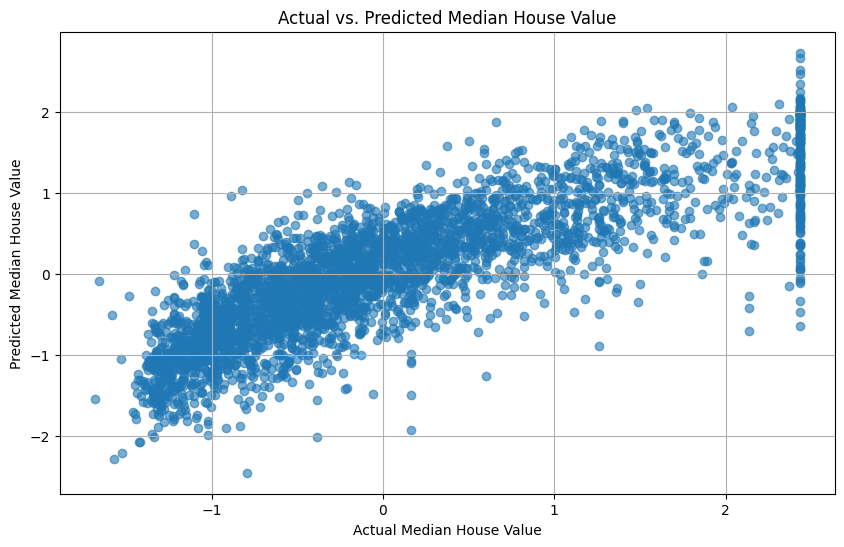

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Median House Value")
plt.grid(True)
plt.show()

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Random Forest - R-squared (R2): {r2_rf}")

Random Forest - Mean Squared Error (MSE): 0.18811943502253017
Random Forest - Root Mean Squared Error (RMSE): 0.43372737407561696
Random Forest - R-squared (R2): 0.8162210658780192


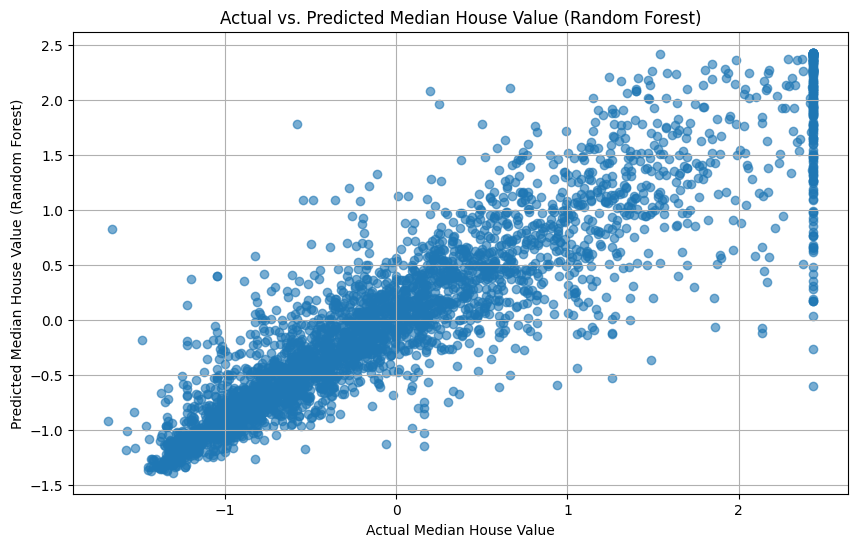

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value (Random Forest)")
plt.title("Actual vs. Predicted Median House Value (Random Forest)")
plt.grid(True)
plt.show()

In [24]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train the model
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - Mean Squared Error (MSE): {mse_ridge}")
print(f"Ridge Regression - Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"Ridge Regression - R-squared (R2): {r2_ridge}")

Ridge Regression - Mean Squared Error (MSE): 0.3159882931319484
Ridge Regression - Root Mean Squared Error (RMSE): 0.5621283600139281
Ridge Regression - R-squared (R2): 0.6913025403257325


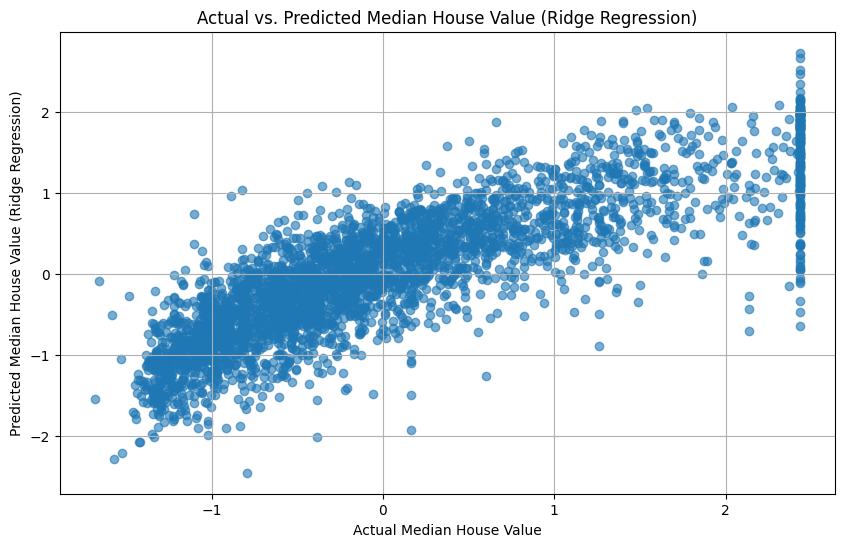

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value (Ridge Regression)")
plt.title("Actual vs. Predicted Median House Value (Ridge Regression)")
plt.grid(True)
plt.show()

### Model Comparison: Linear Regression, Random Forest, and Ridge Regression

We have explored three different regression models for predicting median house values: Linear Regression, Random Forest Regressor, and Ridge Regression. Here's a brief overview of each and why we might use them for this dataset:

*   **Linear Regression:**
    *   **Reasoning:** Linear Regression is a simple and interpretable model that assumes a linear relationship between the features and the target variable. It's a good starting point to understand the basic relationships in the data.
    *   **Differences:** It models the relationship as a straight line (or hyperplane in higher dimensions). It's sensitive to outliers and assumes independence of features.

*   **Random Forest Regressor:**
    *   **Reasoning:** Random Forest is an ensemble method that builds multiple decision trees and averages their predictions. It can capture non-linear relationships and interactions between features, which might be present in complex datasets like housing data. It's generally more robust to outliers than Linear Regression.
    *   **Differences:** It's a non-linear model that can handle complex patterns. It's less interpretable than Linear Regression but often provides better performance on real-world datasets.

*   **Ridge Regression:**
    *   **Reasoning:** Ridge Regression is a type of linear regression that includes a regularization term (L2 penalty) to prevent overfitting. It's useful when there is multicollinearity (high correlation) among features. In our dataset, we saw some correlations between features like `total_rooms`, `total_bedrooms`, and `households`, so Ridge Regression can help.
    *   **Differences:** It's a linear model like Linear Regression but adds a penalty to the coefficients, shrinking them towards zero. This can improve the model's generalization ability, especially with correlated features.

**Comparison for this Dataset:**

Based on the evaluation metrics (MSE, RMSE, R2) we observed:

*   **Linear Regression** provided a baseline performance.
*   **Random Forest Regressor** showed significantly better performance (higher R2, lower MSE/RMSE), suggesting that non-linear relationships and feature interactions are important for predicting house values in this dataset.
*   **Ridge Regression** with the default alpha value performed similarly to the basic Linear Regression, indicating that the default regularization might not be significantly impacting the results or that a different alpha value is needed.

In summary, while Linear and Ridge Regression provide simple linear models, the Random Forest Regressor appears to be more suitable for capturing the complexities of the California Housing dataset and achieving better prediction accuracy. Further tuning of the Random Forest model or exploring other advanced models could potentially lead to even better results.

***Submitted by:***

**-Niba Shoukat**

**-Muntaha Tazeem**